In [2]:
import xarray as xr
import matplotlib.pylab as plt
# %matplotlib inline
# import sompy as sompy
import pandas as pd
import numpy as np
from time import time
# import sompy
import sys
sys.path.append('/Users/ccamargo/Documents/github/SOMPY/sompy/')
import sompy2 as sompy


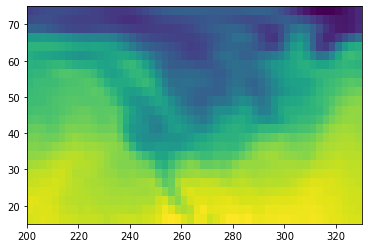

In [3]:
#%% open data
ds = xr.tutorial.open_dataset("air_temperature.nc")
lon_name='lon'
lat_name='lat'
var_name='air'
time_name='time'
data = np.array(ds[var_name])
dimlon=len(ds[lon_name])
dimlat= len(ds[lat_name])
dimtime = len(ds[time_name])
fig = plt.figure()
plt.pcolor(ds.lon,ds.lat,data[0,:,:])
plt.show()

var


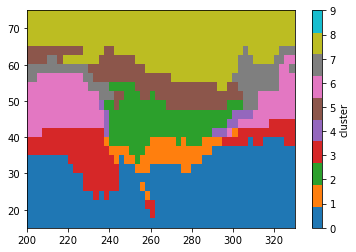

Identified 9 clusters
Topographic error = 0.0; Quantization error = 21.406784240064997
range


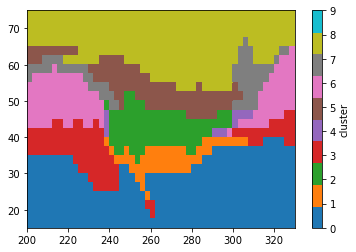

Identified 9 clusters
Topographic error = 0.0; Quantization error = 5.061527325377078


In [8]:

#%% create som 
# reshape data
data = np.array(ds[var_name]).reshape(dimtime,dimlat*dimlon).T
# data = data[0,:,:]
mapsize = [3,3]
for norm in ['var','range']:
    print(norm)
    som = sompy.SOMFactory.build(data, mapsize, mask=None, mapshape='planar', 
                                 lattice='rect',
                                  normalization=norm, # normalize dataset
                                 initialization='pca', 
                                 neighborhood='gaussian', training='batch', name='sompy')  

    # train som 
    init_radius = 2
    final_radius = 1
    n=100
    int_radius = (init_radius + final_radius)/2
    som.train(n_job=1, verbose=None,
               train_rough_len=n, # length of training
               train_finetune_len= n,
               train_rough_radiusin=init_radius,
               train_rough_radiusfin=int_radius,
               train_finetune_radiusin=init_radius,
               train_finetune_radiusfin=final_radius,
              )  # verbose='debug' will print more, and verbose=None wont print anything

    # cluter data on SOM
    c = som.project_data(data)
    plt.pcolor(ds.lon,ds.lat,c.reshape(dimlat,dimlon),
               vmin=0,vmax=mapsize[0]*mapsize[1],cmap='tab10');
    plt.colorbar(label='cluster')
    plt.show()
    print('Identified {} clusters'.format(len(np.unique(c))))
    # print(np.unique(c))
    topographic_error = som.calculate_topographic_error()
    quantization_error = np.mean(som._bmu[1])
    print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))
